In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

# Data Preprocessing

In [2]:
file = "data/spotify_songs.csv"
df = pd.read_csv(file)
df.head(5)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


Convert the release date to year

In [4]:
# Convert 'track_album_release_date' to datetime, using errors='coerce' to handle invalid dates
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Handle cases where the date is just a year (e.g., '2012')
df['track_album_release_date'] = df['track_album_release_date'].fillna(pd.to_datetime(df['track_album_release_date'], format='%Y'))

# Extract the year and create a new column 'year'
df['year'] = df['track_album_release_date'].dt.year
df['year'] = df['year'].astype('Int64')
df.head(5)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019


In [5]:
del df['track_id'], df['track_name'], df['track_album_id'], df['track_album_name'], df['track_album_release_date'], df['playlist_name'], df['playlist_id']
del df['track_artist']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_popularity   32833 non-null  int64  
 1   playlist_genre     32833 non-null  object 
 2   playlist_subgenre  32833 non-null  object 
 3   danceability       32833 non-null  float64
 4   energy             32833 non-null  float64
 5   key                32833 non-null  int64  
 6   loudness           32833 non-null  float64
 7   mode               32833 non-null  int64  
 8   speechiness        32833 non-null  float64
 9   acousticness       32833 non-null  float64
 10  instrumentalness   32833 non-null  float64
 11  liveness           32833 non-null  float64
 12  valence            32833 non-null  float64
 13  tempo              32833 non-null  float64
 14  duration_ms        32833 non-null  int64  
 15  year               30947 non-null  Int64  
dtypes: Int64(1), float64(9

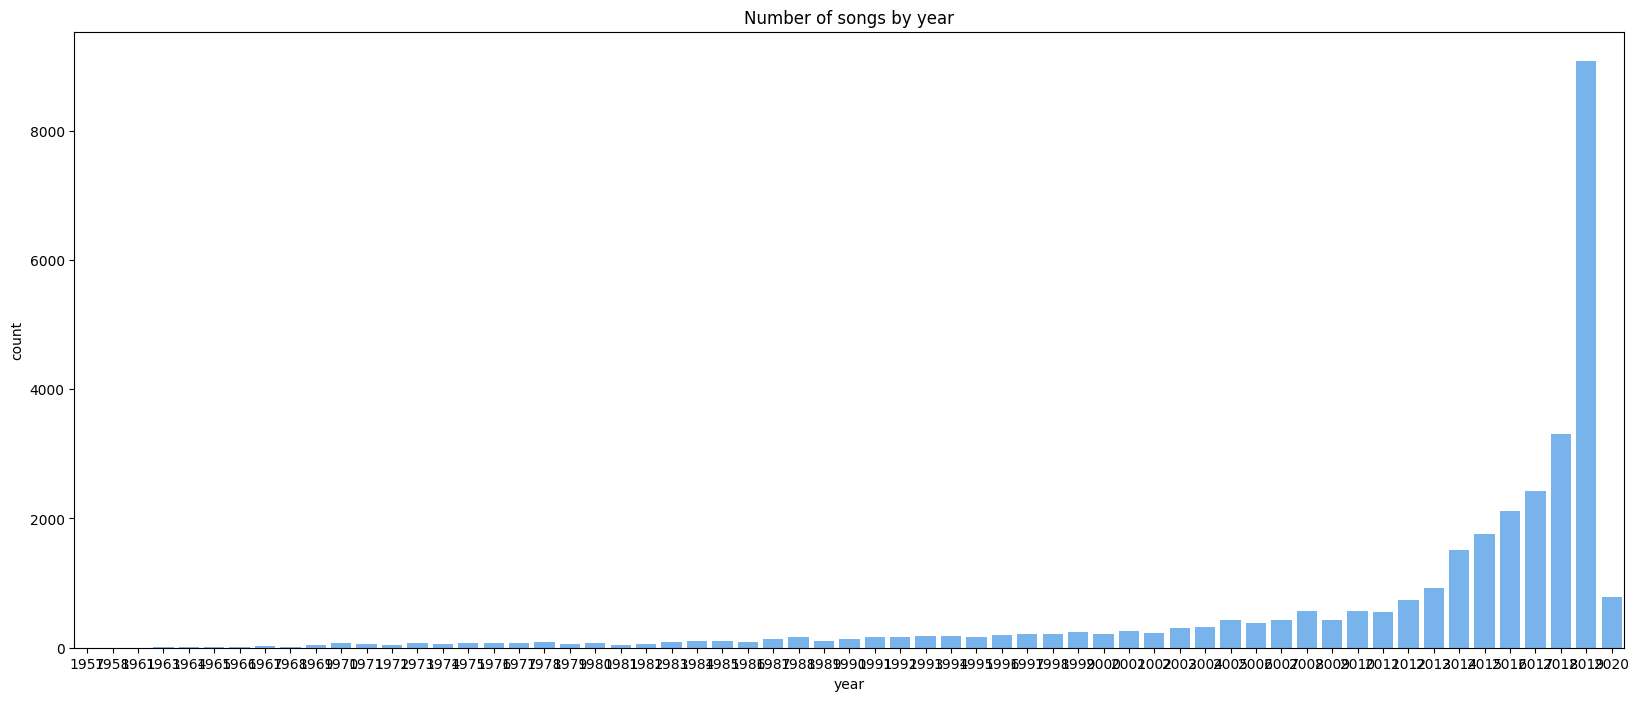

In [56]:
year_count = df["year"].value_counts()
#print(year_count)
plt.figure(figsize=(20,8))
sns.countplot(x='year', data=df, color="#66b3ff")
plt.title('Number of songs by year')
plt.show()


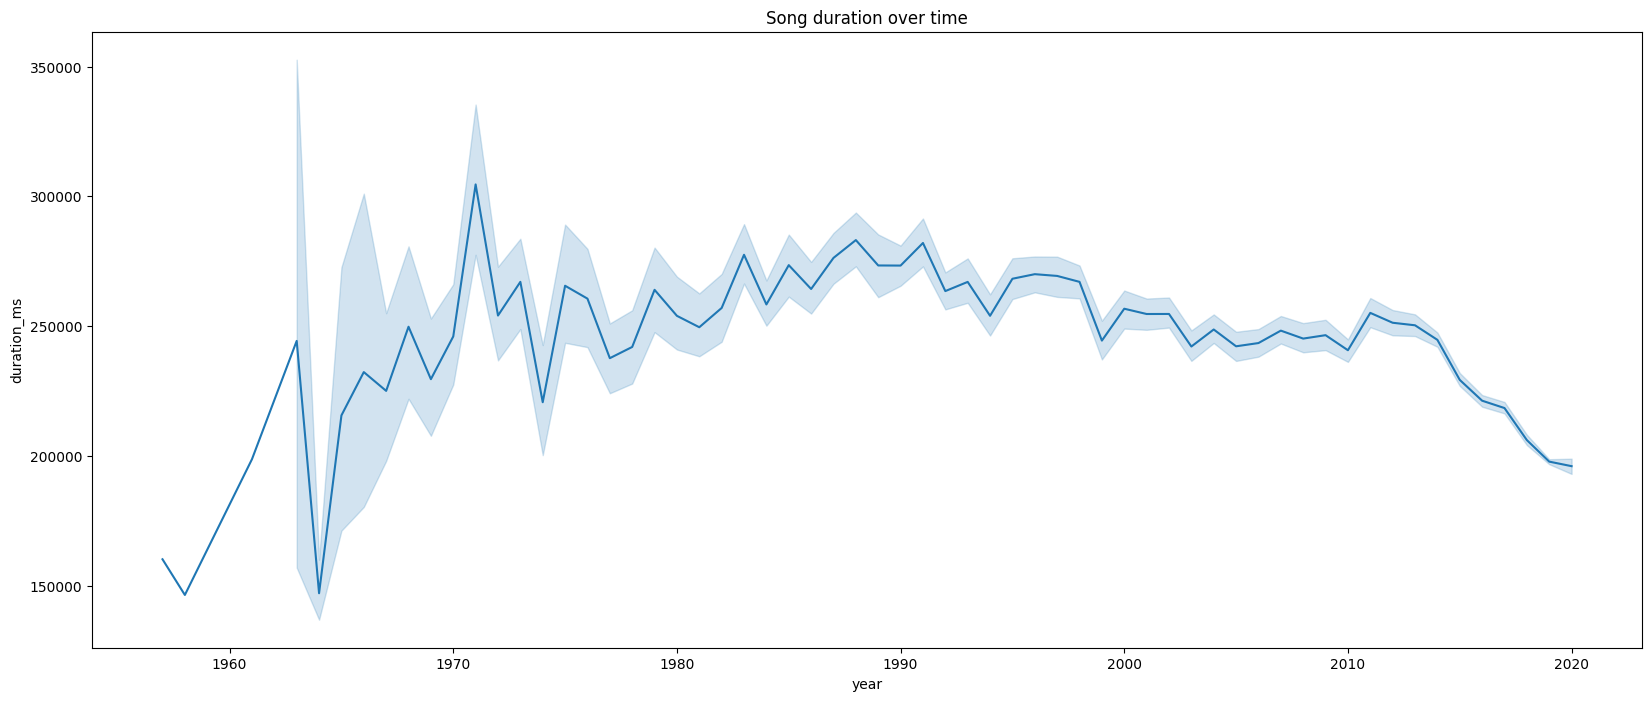

In [45]:
plt.figure(figsize=(20, 8))
sns.lineplot(x='year', y='duration_ms', data=df)
plt.title('Song duration over time')
plt.show()

playlist_genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64


/var/folders/zz/8_f_jhbx01ldy3fbjlr9zn7r0000gn/T/ipykernel_75103/1821637890.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='playlist_genre', data=df, palette='Set2')


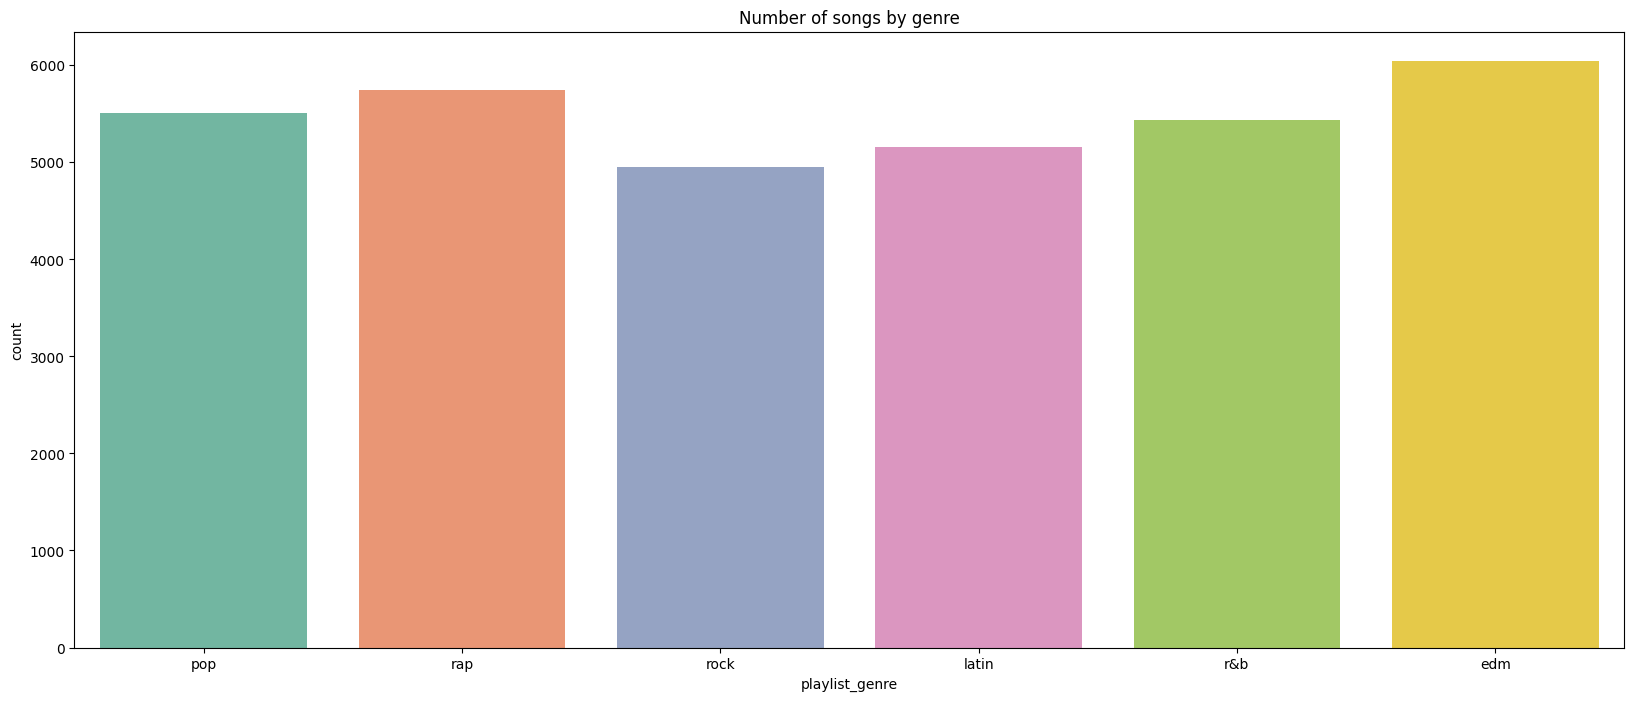

In [49]:
genre_count = df['playlist_genre'].value_counts()
print(genre_count)

plt.figure(figsize=(20,8))
sns.countplot(x='playlist_genre', data=df, palette='Set2')
plt.title('Number of songs by genre')
plt.show()

/var/folders/zz/8_f_jhbx01ldy3fbjlr9zn7r0000gn/T/ipykernel_75103/3784933173.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='playlist_subgenre', data=df, palette='Set3')


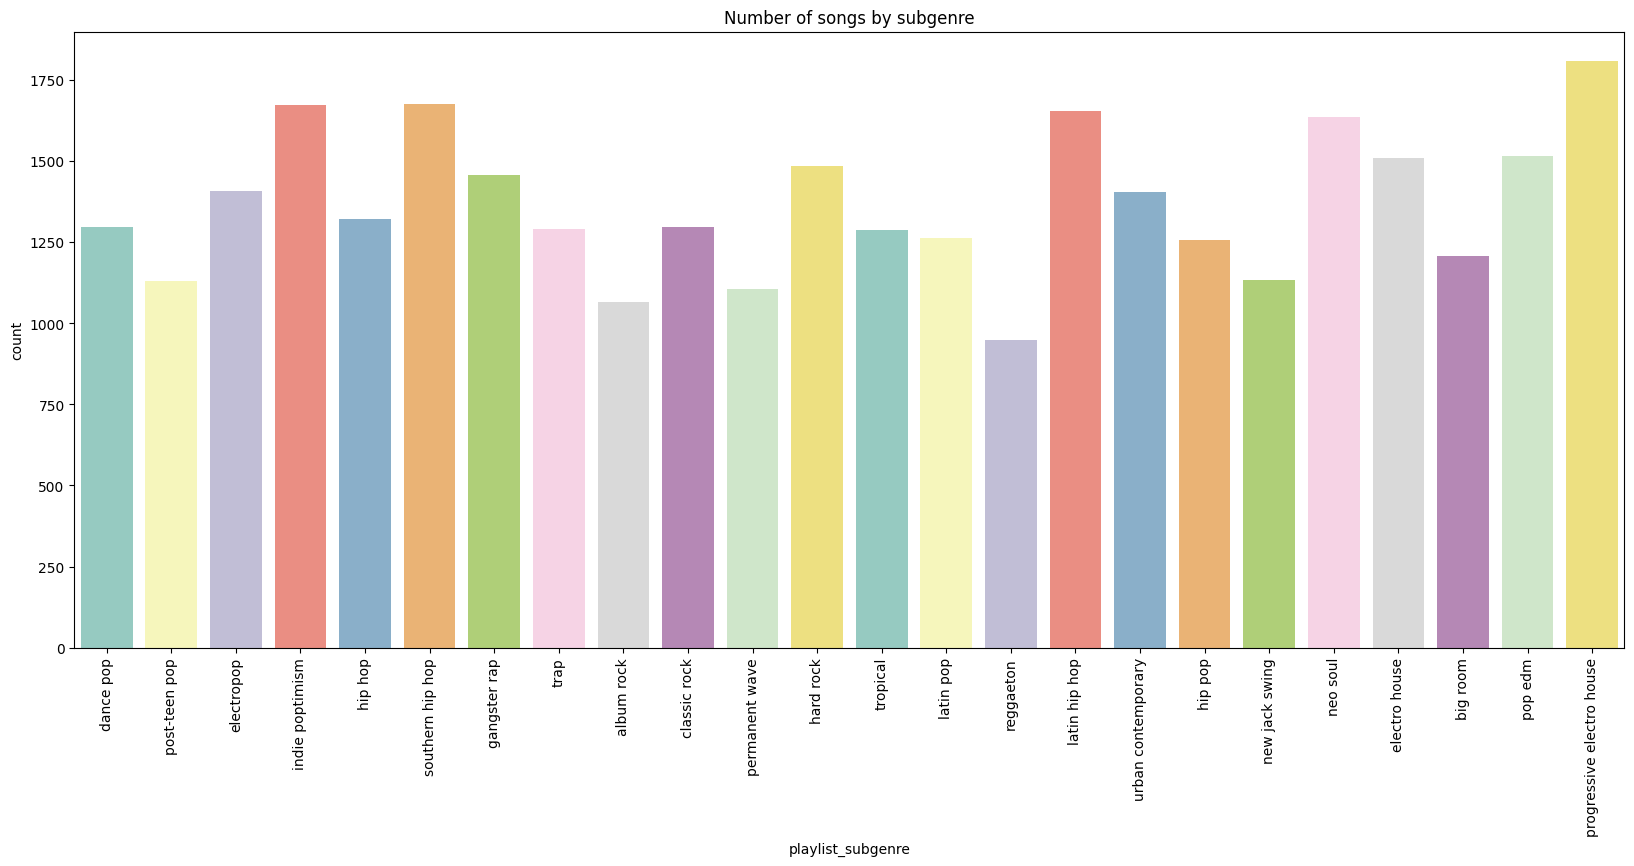

In [52]:
plt.figure(figsize=(20,8))
sns.countplot(x='playlist_subgenre', data=df, palette='Set3')
plt.xticks(rotation=90)
plt.title('Number of songs by subgenre')
plt.show()

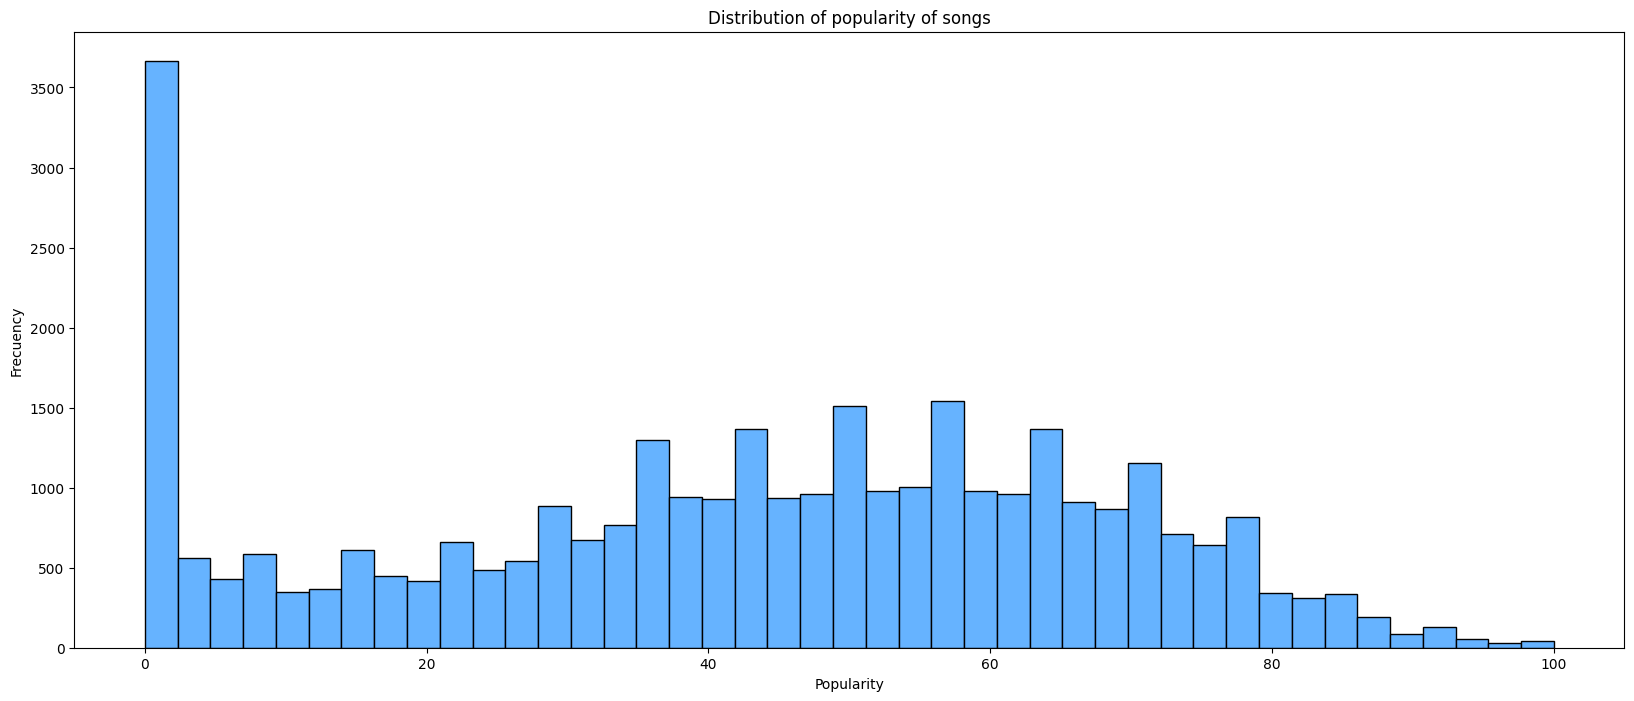

In [55]:
plt.figure(figsize=(20,8))
plt.hist(df['track_popularity'], bins='auto', color='#66b3ff', edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Frecuency')
plt.title('Distribution of popularity of songs')
plt.show()

Get Hot-Label for genre

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_popularity   32833 non-null  int64  
 1   playlist_genre     32833 non-null  object 
 2   playlist_subgenre  32833 non-null  object 
 3   danceability       32833 non-null  float64
 4   energy             32833 non-null  float64
 5   key                32833 non-null  int64  
 6   loudness           32833 non-null  float64
 7   mode               32833 non-null  int64  
 8   speechiness        32833 non-null  float64
 9   acousticness       32833 non-null  float64
 10  instrumentalness   32833 non-null  float64
 11  liveness           32833 non-null  float64
 12  valence            32833 non-null  float64
 13  tempo              32833 non-null  float64
 14  duration_ms        32833 non-null  int64  
 15  year               30947 non-null  Int64  
dtypes: Int64(1), float64(9

In [24]:
le = LabelEncoder()
df_for_model = df.drop(df.select_dtypes(include=['object']) , axis=1)
df_for_model['playlist_genre'] = le.fit_transform(df['playlist_genre'])
df_for_model.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,playlist_genre
0,66,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019,2
1,67,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019,2
2,70,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019,2
3,60,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019,2
4,69,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019,2


In [25]:
print(genre_count, df_for_model['playlist_genre'].value_counts())

playlist_genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64 playlist_genre
0    6043
4    5746
2    5507
3    5431
1    5155
5    4951
Name: count, dtype: int64


The labels with the original genre.
- edm = 0
- latin = 1
- pop = 2
- r&b = 3
- rap = 4
- rock = 5

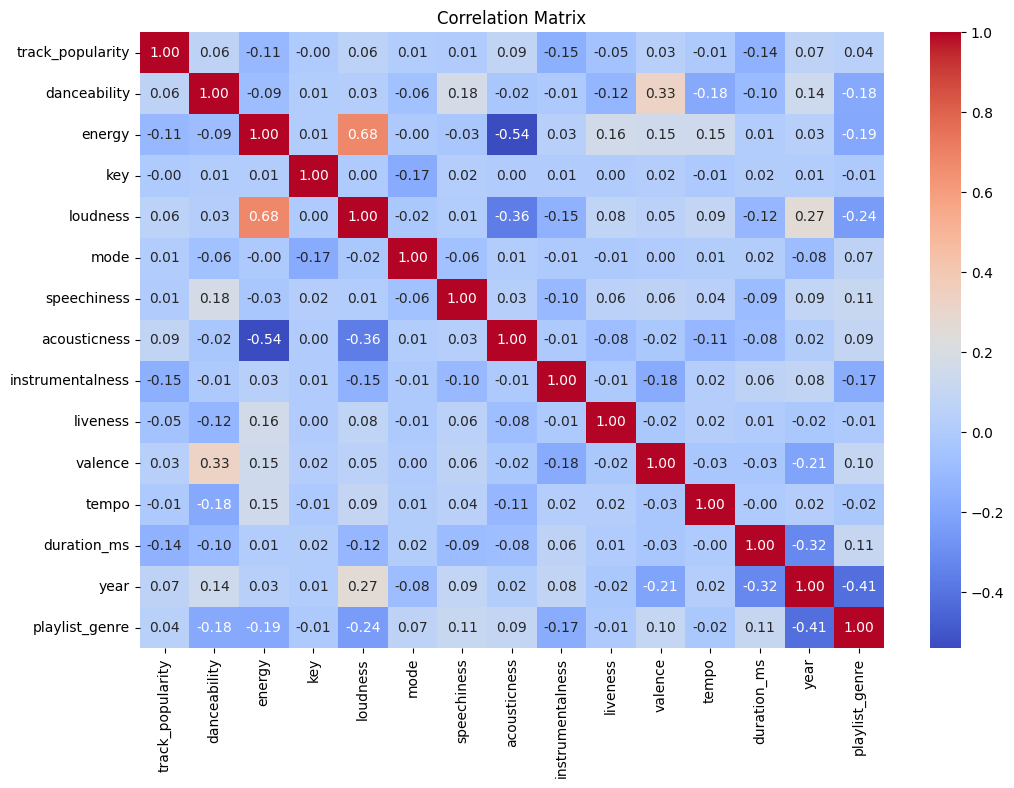

In [65]:
# Correlation Matrix
corr_matrix = df_for_model.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

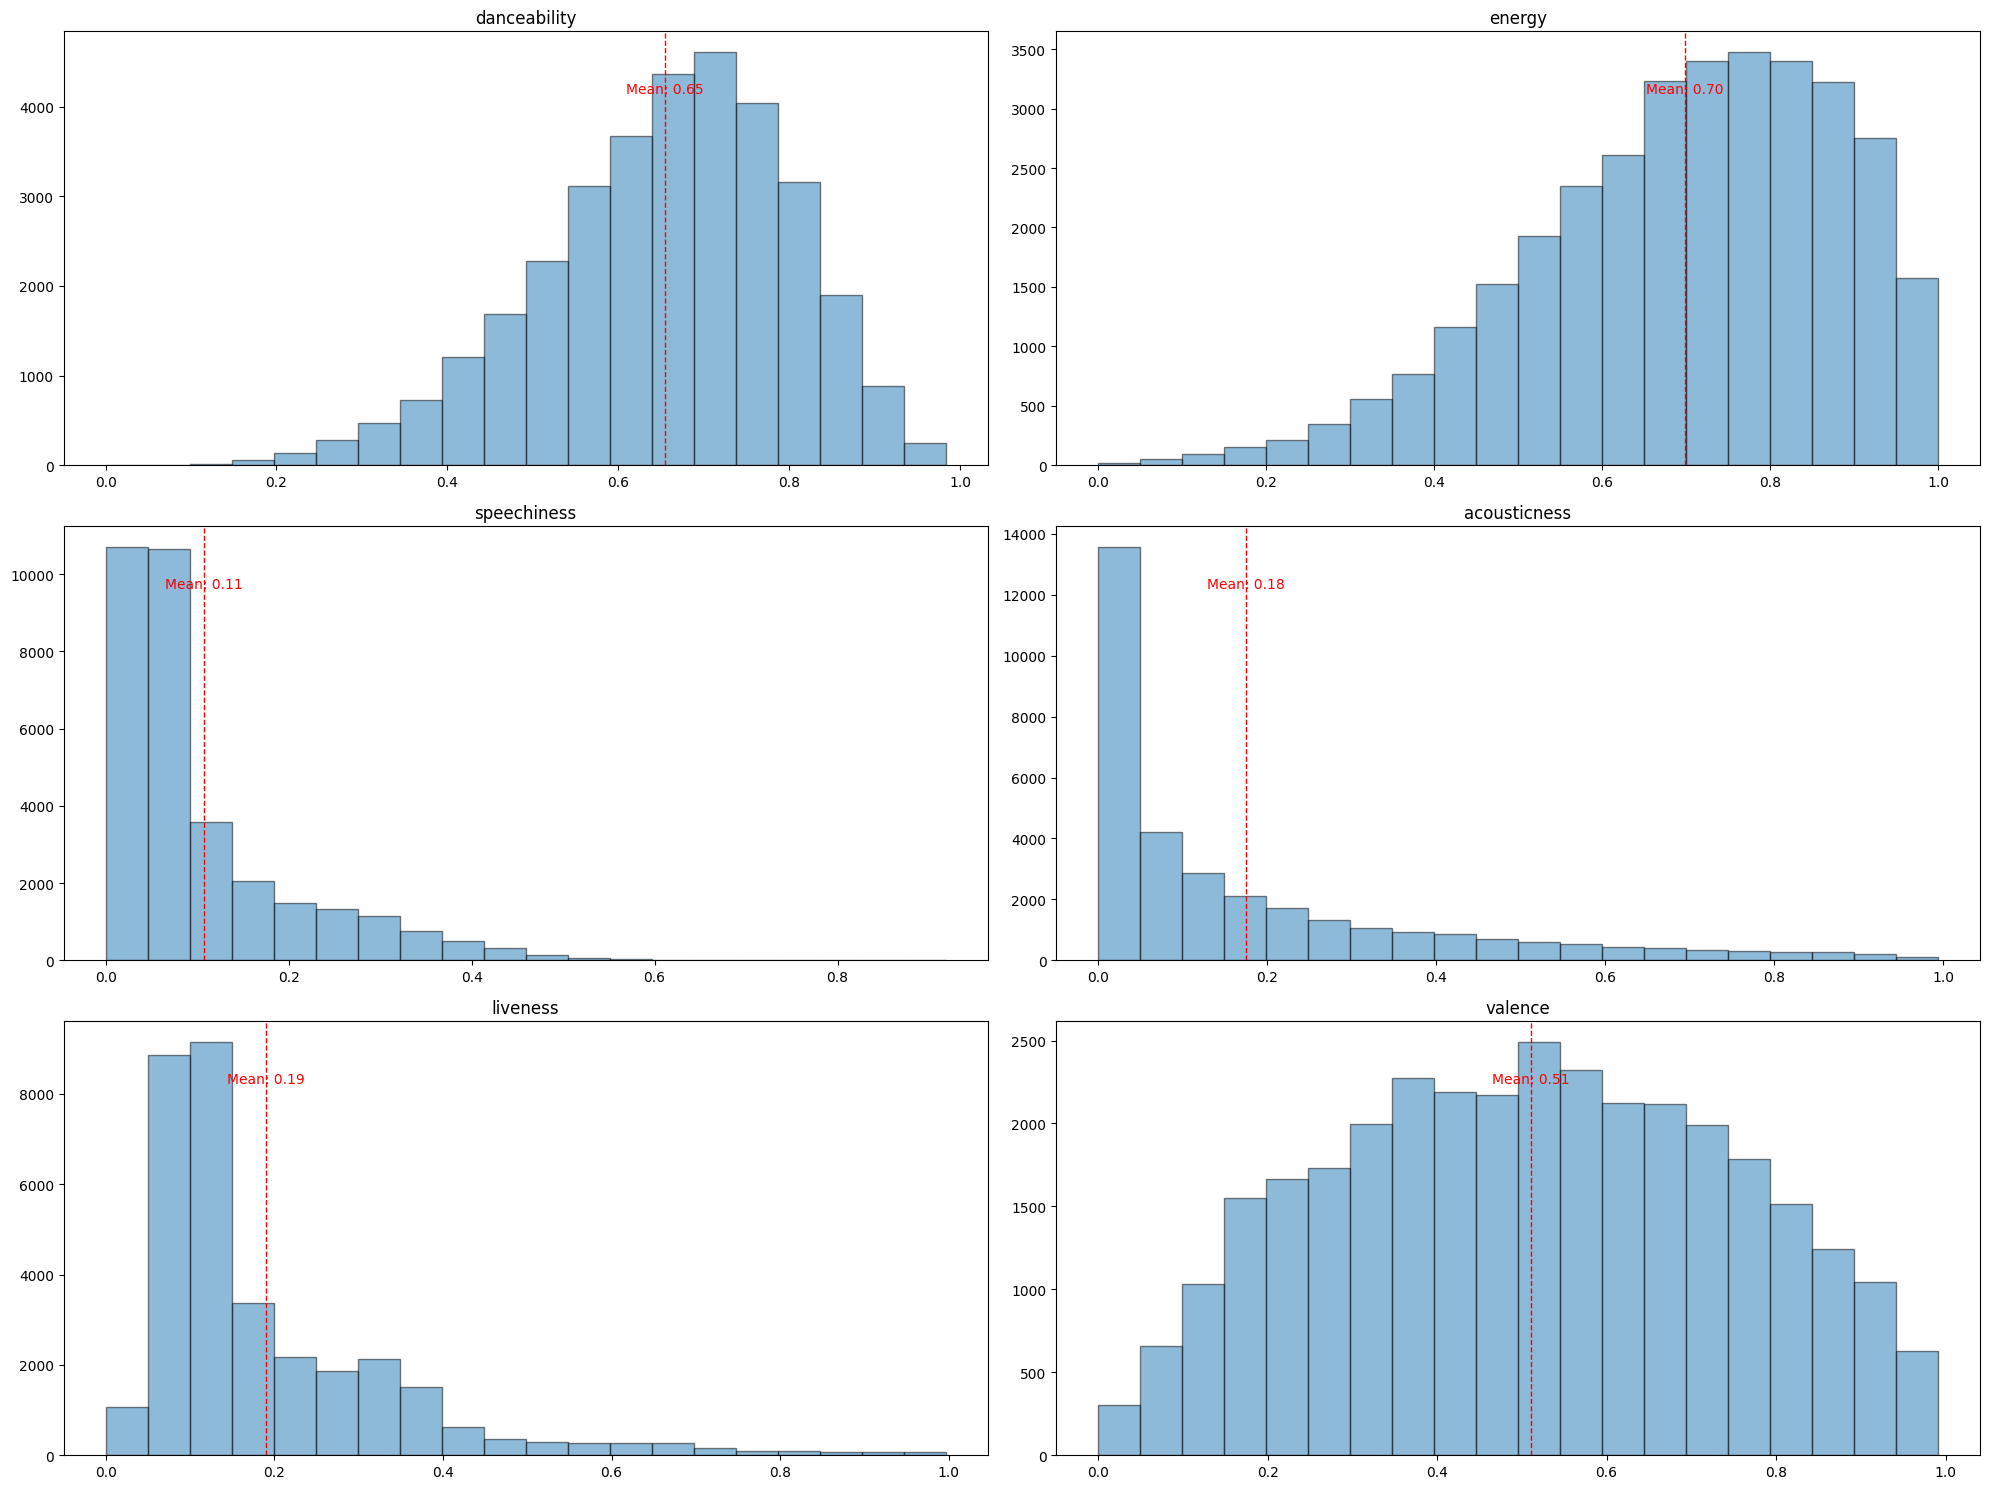

In [62]:
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

features = ['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence']

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    ax = axs[row][col]
    
    # Plot the histogram
    n, bins, patches = ax.hist(df_for_model[feature], bins=20, edgecolor='black', alpha=0.5)
    ax.set_title(feature)
    
    # Calculate and plot the mean
    mean = np.mean(df_for_model[feature])
    std = np.std(df_for_model[feature])
    
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=1)
    ax.text(mean, max(n) * 0.9, f'Mean: {mean:.2f}', color='red', ha='center')

    for patch in patches:
        patch.set_edgecolor('black')

plt.tight_layout()
plt.show()

# Data Split

By some features

In [110]:
train_df = df[df['year'] < 2019]
test_df = df[df['year'] >= 2019]
print(f"Training: {len(train_df)}, Testing:{len(test_df)}")

Training: 21083, Testing:9864


In [ ]:
# Featuring
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
X_train = train_df[features]
y_train = train_df['playlist_genre']
X_test = test_df[features]
y_test = test_df['playlist_genre']

In [127]:
emo_features = ['danceability', 'energy', 'loudness', 'valence', 'tempo']
X_train = train_df[emo_features]
y_train = train_df['playlist_genre']
X_test = test_df[emo_features]
y_test = test_df['playlist_genre']

Use All the Features

In [26]:
X = df_for_model.drop('playlist_genre', axis=1)
# create dataset Y with only playlist_genre
y = df_for_model['playlist_genre']
# split data into train and testing
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    train_size = 0.75,
    test_size = 0.25,
    random_state=10
)

In [27]:
print(f"X(train, test): {len(X_train),len(X_test)}, y(train, test): {len(y_train), len(y_test)}")

X(train, test): (24624, 8209), y(train, test): (24624, 8209)


# Random Forest Tree

Use emotional features

In [128]:
# emo_features
# Training Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Testing Model
y_pred = rf_model.predict(X_test)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

         edm       0.68      0.60      0.64      2505
       latin       0.50      0.26      0.34      2010
         pop       0.26      0.26      0.26      1541
         r&b       0.23      0.35      0.28      1200
         rap       0.44      0.49      0.47      1983
        rock       0.36      0.55      0.43       625

    accuracy                           0.42      9864
   macro avg       0.41      0.42      0.40      9864
weighted avg       0.45      0.42      0.43      9864

Accuracy: 0.42
Precision: 0.45
Recall: 0.42
F1 Score: 0.43


Use part of features

In [ ]:
# Training Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Testing Model
y_pred = rf_model.predict(X_test)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

         edm       0.74      0.63      0.68      2505
       latin       0.53      0.34      0.41      2010
         pop       0.28      0.33      0.31      1541
         r&b       0.26      0.33      0.29      1200
         rap       0.51      0.61      0.56      1983
        rock       0.52      0.65      0.58       625

    accuracy                           0.49      9864
   macro avg       0.47      0.48      0.47      9864
weighted avg       0.51      0.49      0.49      9864

Accuracy: 0.49
Precision: 0.51
Recall: 0.49
F1 Score: 0.49


In [ ]:
# Define parameter
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Model
print(f"Best Parameters: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_

# Test Best Model
y_pred_optimized = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred_optimized))

Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 150}
              precision    recall  f1-score   support

         edm       0.75      0.64      0.69      2505
       latin       0.50      0.38      0.44      2010
         pop       0.30      0.32      0.31      1541
         r&b       0.27      0.30      0.28      1200
         rap       0.51      0.62      0.56      1983
        rock       0.53      0.67      0.59       625

    accuracy                           0.49      9864
   macro avg       0.48      0.49      0.48      9864
weighted avg       0.51      0.49      0.50      9864



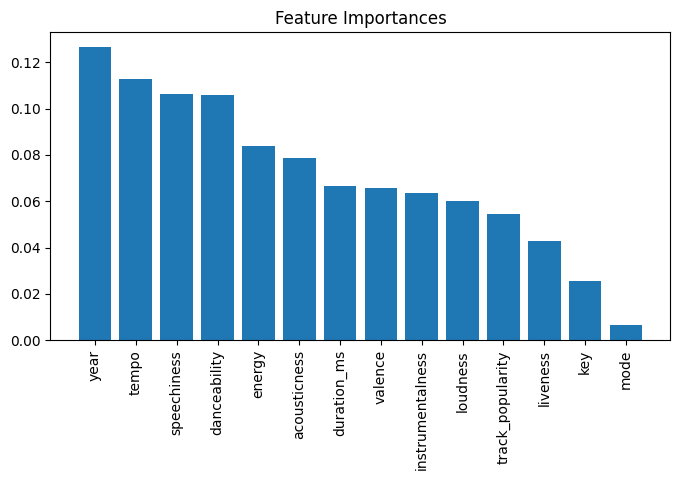

In [171]:
# Train model and observe the feature importance
model = grid_search.best_estimator_
feature_importances = model.feature_importances_

# Visualization
features = X_train.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(8, 4))
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.title("Feature Importances")
plt.show()


Use All the features

In [29]:
forestModel = RandomForestClassifier()
forestModel.fit(X_train,y_train)
y_pred = forestModel.predict(X_test)

In [30]:
print(f"Accuracy:{accuracy_score(y_test,y_pred):.2f}")

Accuracy:0.58


In [31]:
scores = cross_val_score(forestModel, X_train, y_train, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Score:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

Cross-Validation Scores: [0.57928934 0.57949239 0.56243655 0.57725888 0.57900081]
Mean Score: 0.5754955939416182
Standard Deviation: 0.0065772528506381775


In [32]:
# Training Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Testing Model
y_pred = rf_model.predict(X_test)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1515
           1       0.51      0.44      0.47      1311
           2       0.41      0.39      0.40      1370
           3       0.50      0.47      0.49      1312
           4       0.59      0.65      0.62      1468
           5       0.75      0.80      0.77      1233

    accuracy                           0.58      8209
   macro avg       0.57      0.58      0.57      8209
weighted avg       0.57      0.58      0.57      8209

Accuracy: 0.58
Precision: 0.57
Recall: 0.58
F1 Score: 0.57


In [33]:
from sklearn.model_selection import GridSearchCV

# Define parameter
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10, 15]
}

# GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Model
print(f"Best Parameters: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_

# Test Best Model
y_pred_optimized = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred_optimized))


Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1515
           1       0.52      0.45      0.48      1311
           2       0.41      0.40      0.40      1370
           3       0.51      0.46      0.48      1312
           4       0.58      0.66      0.62      1468
           5       0.75      0.81      0.78      1233

    accuracy                           0.58      8209
   macro avg       0.58      0.58      0.58      8209
weighted avg       0.58      0.58      0.58      8209



In [34]:
# Define parameter
param_grid = {
    'n_estimators': [100, 200, 300], # Larger estimators
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10, 15]
}

grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Model
print(f"Best Parameters: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_

# Test Best Model
y_pred_optimized = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred_optimized))

Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1515
           1       0.51      0.45      0.48      1311
           2       0.41      0.40      0.41      1370
           3       0.51      0.47      0.49      1312
           4       0.60      0.66      0.63      1468
           5       0.75      0.82      0.78      1233

    accuracy                           0.59      8209
   macro avg       0.58      0.58      0.58      8209
weighted avg       0.58      0.59      0.58      8209



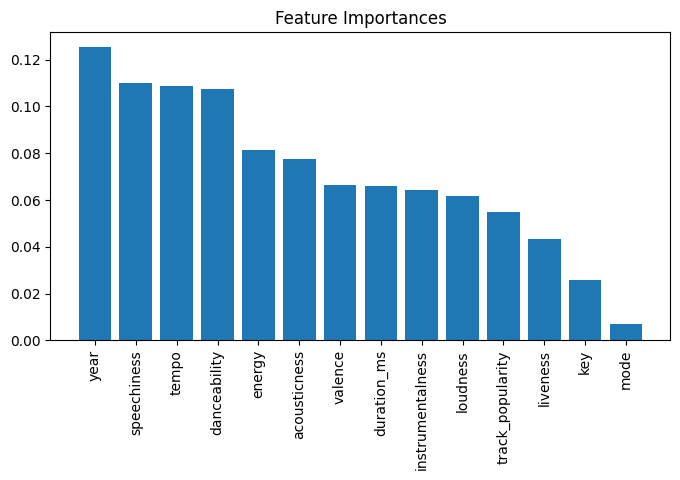

In [ ]:
# Train model and observe the feature importance
feature_importances = best_rf_model.feature_importances_

# Visualization
features = X_train.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(8, 4))
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.title("Feature Importances")
plt.show()


# Neuronal Network

In [177]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [178]:
# Define the features and target
X = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
y =df['playlist_genre']

# Convert the target to categorical
# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

# Compile the model
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


774/774 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - accuracy: 0.3933 - loss: 1.5191 - val_accuracy: 0.4968 - val_loss: 1.3098
Epoch 2/100
774/774 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - accuracy: 0.4767 - loss: 1.3493 - val_accuracy: 0.5124 - val_loss: 1.2766
Epoch 3/100
774/774 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - accuracy: 0.4928 - loss: 1.3141 - val_accuracy: 0.5194 - val_loss: 1.2537
Epoch 4/100
774/774 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - accuracy: 0.5039 - loss: 1.2889 - val_accuracy: 0.5233 - val_loss: 1.2437
Epoch 5/100
774/774 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step - accuracy: 0.5045 - loss: 1.2892 - val_accuracy: 0.5212 - val_loss: 1.2386
Epoch 6/100
774/774 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - accuracy: 0.5103 - loss: 1.2782 - val_accuracy: 0.5276 - val_loss: 1.2332
Epoch 7/100
774/774 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.5143 - loss: 1.2673 - val_accuracy: 0.5365 - val_loss: 1.2150
Epoch 8/100
774/774 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - accuracy: 0.5173 - loss: 1.2591 - val_

In [179]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.5444 - loss: 1.1698
Test loss: 1.186
Test accuracy: 0.546


# XGBoost

In [28]:
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Instantiate the model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:42:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.5914240467779267
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      1515
           1       0.51      0.46      0.48      1311
           2       0.43      0.44      0.43      1370
           3       0.50      0.48      0.49      1312
           4       0.61      0.66      0.63      1468
           5       0.77      0.81      0.79      1233

    accuracy                           0.59      8209
   macro avg       0.59      0.59      0.59      8209
weighted avg       0.59      0.59      0.59      8209



# Comparison

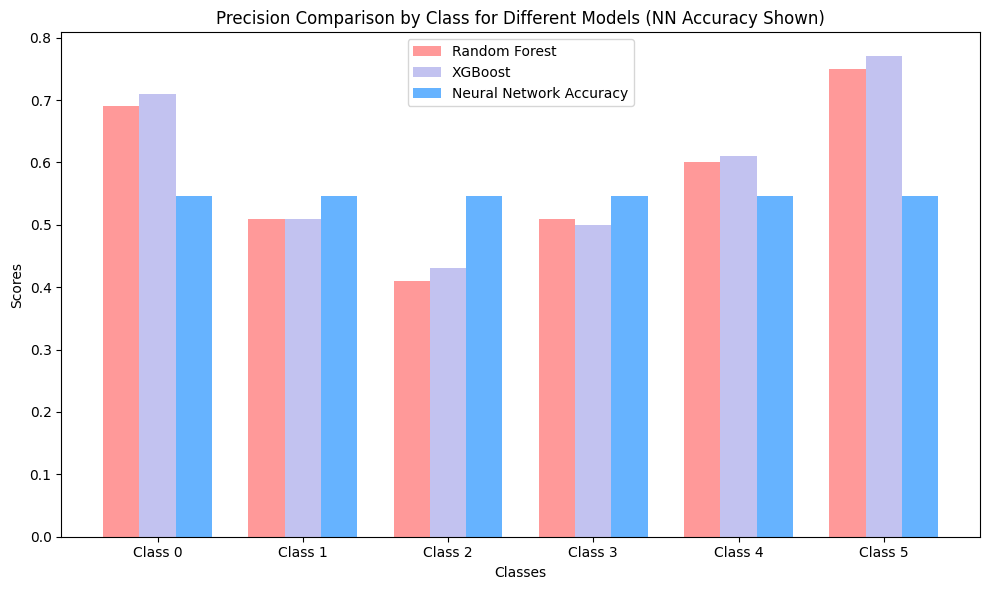

In [53]:
# Model
models = ['Random Forest', 'Neural Network', 'XGBoost']

# Precision
precision_rf = [0.69, 0.51, 0.41, 0.51, 0.60, 0.75]  # Random Forest precision
precision_xgb = [0.71, 0.51, 0.43, 0.50, 0.61, 0.77]  # XGBoost precision

# Labels
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Neural Network
accuracy_nn = 0.546  # 假設 Neural Network 準確率是 0.546

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
index = np.arange(len(classes))

# Random Forest precision
bars1 = ax.bar(index - bar_width, precision_rf, bar_width, label='Random Forest', color='#ff9999')

# XGBoost precision
bars2 = ax.bar(index, precision_xgb, bar_width, label='XGBoost', color='#c2c2f0')

# Neural Network accuracy
bars3 = ax.bar(index + bar_width, [accuracy_nn] * len(classes), bar_width, label='Neural Network Accuracy', color='#66b3ff')


ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision Comparison by Class for Different Models (NN Accuracy Shown)')
ax.set_xticks(index)
ax.set_xticklabels(classes)


ax.legend()


plt.tight_layout()
plt.show()


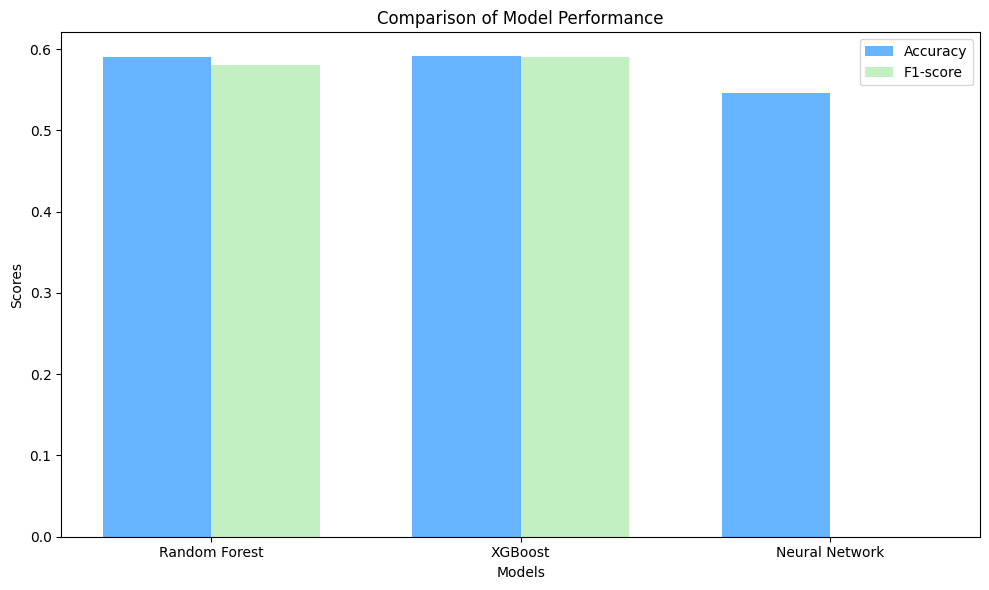

In [54]:

models = ['Random Forest', 'XGBoost', 'Neural Network']

# acc
#accuracies = [0.59, 0.546, 0.591]
accuracies = [0.59, 0.591, 0.546]

# F1-score (weighted avg)
#f1_scores = [0.58, 0, 0.59]  
f1_scores = [0.58, 0.59, 0]  


# plot
fig, ax = plt.subplots(figsize=(10, 6))


bar_width = 0.35
index = np.arange(len(models))
bars1 = ax.bar(index, accuracies, bar_width, label='Accuracy', color='#66b3ff')
bars2 = ax.bar(index + bar_width, f1_scores, bar_width, label='F1-score', color='#c2f0c2')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)


ax.legend()


plt.tight_layout()
plt.show()
